In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cardio = pd.read_csv('./data/cardio.csv',sep=',')
stroke = pd.read_csv('./data/stroke.csv')

In [3]:
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68421,52,2,168,76.0,120,80,1,1,1,0,1,0
68422,61,1,158,126.0,140,90,2,2,0,0,1,1
68423,52,2,183,105.0,180,90,3,1,0,1,0,1
68424,61,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
X = cardio.drop("cardio", axis=1)
y = cardio["cardio"]

# cluster of cardio

In [41]:
from sklearn import metrics
def evaluate_metrics(y,y_pred,X):
    print('adjusted Rand index:',metrics.adjusted_rand_score(y,y_pred))
    print('adjusted_mutual_info_score:',metrics.adjusted_mutual_info_score(y,y_pred))
    silhouette=metrics.silhouette_score(X,y_pred)
    print('silhouette_score',silhouette)
    calinski_harabasz=metrics.calinski_harabasz_score(X,y_pred)
    print('calinski_harabasz_score',calinski_harabasz)
    davies_bouldin=metrics.davies_bouldin_score(X,y_pred)
    print('davies_bouldin_score',davies_bouldin)
    return silhouette,calinski_harabasz,davies_bouldin 
    

## K-means

In [6]:
from sklearn.cluster import MiniBatchKMeans, KMeans  
s_score=[]
ch_wcore=[]
db_wcore=[]
for k in range(2,10):
    km = KMeans(init='k-means++', n_clusters=k, random_state=28) 
    km.fit(X) 
    print('n_cluster:',k) 
    y_pred = km.predict(X)  
    silhouette,calinski_harabasz,davies_bouldin =evaluate_metrics(y,y_pred,X)
    s_score.append(silhouette)
    ch_wcore.append(calinski_harabasz)
    db_wcore.append(davies_bouldin)

n_cluster: 2
adjusted Rand index: 0.16013164468987864
adjusted_mutual_info_score: 0.13723513201917478
silhouette_score 0.33620265922648296
calinski_harabasz_score 35038.65320659159
davies_bouldin_score 1.243732199119887
n_cluster: 3
adjusted Rand index: 0.12020852707268574
adjusted_mutual_info_score: 0.10684398735178599
silhouette_score 0.2766859380846893
calinski_harabasz_score 28835.009893766877
davies_bouldin_score 1.2702455870207352
n_cluster: 4
adjusted Rand index: 0.07597725679520156
adjusted_mutual_info_score: 0.09271952162284128
silhouette_score 0.23227252247019906
calinski_harabasz_score 24956.208536233833
davies_bouldin_score 1.3483266066111537
n_cluster: 5
adjusted Rand index: 0.06595054956030803
adjusted_mutual_info_score: 0.09236508334273624
silhouette_score 0.2226037112743545
calinski_harabasz_score 23217.78578738358
davies_bouldin_score 1.3596186102453012
n_cluster: 6
adjusted Rand index: 0.060613110254194906
adjusted_mutual_info_score: 0.0878822191340742
silhouette_scor

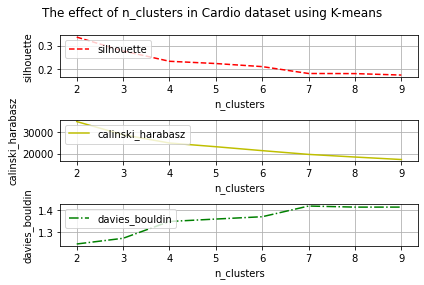

In [21]:

t=np.arange(2,10)


plt.suptitle('The effect of n_clusters in Cardio dataset using K-means') 
ax1 = plt.subplot(311)
ax1.plot(t,s_score, color="r",linestyle = "--",label='silhouette')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('silhouette')
ax1.legend(loc='upper left')   
ax1.grid(True)   

ax2 = plt.subplot(312)
ax2.plot(t,ch_wcore,color="y",linestyle = "-",label='calinski_harabasz')
ax2.set_xlabel('n_clusters')
ax2.set_ylabel('calinski_harabasz')
ax2.legend(loc='upper left')   
ax2.grid(True)   

ax3 = plt.subplot(313)
ax3.plot(t,db_wcore,color="g",linestyle = "-.",label='davies_bouldin')
ax3.set_xlabel('n_clusters')
ax3.set_ylabel('davies_bouldin')
ax3.legend(loc='upper left')  
ax3.grid(True)   

plt.tight_layout()

## DBSCAN

In [43]:
from sklearn import cluster
clst = cluster.DBSCAN(eps=0.5,min_samples=2); 
y_pred= clst.fit_predict(X)
silhouette,calinski_harabasz,davies_bouldin =evaluate_metrics(y,y_pred,X)
print("Core sample num:%d"%len(clst.core_sample_indices_))

adjusted Rand index: 0.0007714666975655478
adjusted_mutual_info_score: 0.01095511950783145
silhouette_score -0.6190508153742668
calinski_harabasz_score 0.9366995659214907
davies_bouldin_score 1.7386470902165438
Core sample num:7544


In [24]:
def test_DBSCAN_epsilon(X,y):
    epsilons = [0.5,1,10]
    s_score=[]
    ch_wcore=[]
    db_wcore=[]
    for epsilon in epsilons:
        clst = cluster.DBSCAN(eps=epsilon)
        y_pred = clst.fit_predict(X)
        silhouette,calinski_harabasz,davies_bouldin =evaluate_metrics(y,y_pred,X)
        s_score.append(silhouette)
        ch_wcore.append(calinski_harabasz)
        db_wcore.append(davies_bouldin)

    t=epsilons
    #plt.figure()
    plt.suptitle('The effect of epsilon in Cardio dataset by using DBSCAN') 
    ax1 = plt.subplot(311)
    ax1.plot(t,s_score, color="r",linestyle = "--",label='silhouette')
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('silhouette')
    ax1.legend(loc='upper left')  
    ax1.grid(True)   

    ax2 = plt.subplot(312)
    ax2.plot(t,ch_wcore,color="y",linestyle = "-",label='calinski_harabasz')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('calinski_harabasz')
    ax2.legend(loc='upper left')   
    ax2.grid(True)   

    ax3 = plt.subplot(313)
    ax3.plot(t,db_wcore,color="g",linestyle = "-.",label='davies_bouldin')
    ax3.set_xlabel('epsilon')
    ax3.set_ylabel('davies_bouldin')
    ax3.legend(loc='upper left')   
    ax3.grid(True)   

    plt.tight_layout()
   

adjusted Rand index: -0.00024148319278344382
adjusted_mutual_info_score: 0.003803835686089995
silhouette_score -0.47411551938831753
calinski_harabasz_score 1.928623777189365
davies_bouldin_score 1.892046325785635
adjusted Rand index: 0.007573530556855546
adjusted_mutual_info_score: 0.019731247307344074
silhouette_score -0.6460600561591208
calinski_harabasz_score 8.399540075170135
davies_bouldin_score 1.6227608623227325
adjusted Rand index: 0.0001679896876144277
adjusted_mutual_info_score: 0.0014220308120371336
silhouette_score 0.23050308859596144
calinski_harabasz_score 90.26492125996162
davies_bouldin_score 1.7433253779176032


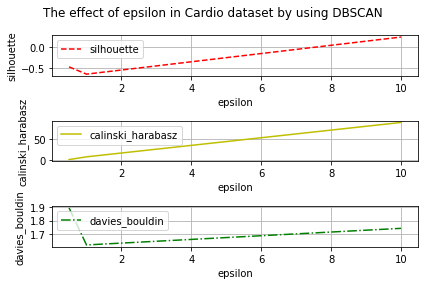

In [25]:
test_DBSCAN_epsilon(X,y)

In [26]:
from sklearn import metrics
def evaluate_metrics(y,y_pred,X):
  
    print('adjusted Rand index:',metrics.adjusted_rand_score(y,y_pred))
    print('adjusted_mutual_info_score:',metrics.adjusted_mutual_info_score(y,y_pred))
    
    silhouette=metrics.silhouette_score(X,y_pred)
    print('silhouette_score',silhouette)
    calinski_harabasz=metrics.calinski_harabasz_score(X,y_pred)
    print('calinski_harabasz_score',calinski_harabasz)
    return silhouette,calinski_harabasz

In [27]:
def test_DBSCAN_min_samples(X,y):
    min_samples=range(1,20,5)
    s_score=[]
    ch_wcore=[]
    for num in min_samples:
        clst = cluster.DBSCAN(min_samples=num)
        y_pred = clst.fit_predict(X)
        print("min_samples:",num)
        silhouette,calinski_harabasz=evaluate_metrics(y,y_pred,X)
        s_score.append(silhouette)
        ch_wcore.append(calinski_harabasz)
       
    t=min_samples
       
    plt.suptitle('The effect of min_samples in Cardio dataset by using DBSCAN') 
    ax1 = plt.subplot(211)
    ax1.plot(t,s_score, color="r",linestyle = "--",label='silhouette')
    ax1.set_xlabel('min_samples')
    ax1.set_ylabel('silhouette')
    ax1.legend(loc='upper left')   
    ax1.grid(True)   

    ax2 = plt.subplot(212)
    ax2.plot(t,ch_wcore,color="y",linestyle = "-",label='calinski_harabasz')
    ax2.set_xlabel('min_samples')
    ax2.set_ylabel('calinski_harabasz')
    ax2.legend(loc='upper left')   
    ax2.grid(True)   


    plt.tight_layout()


min_samples: 1
adjusted Rand index: 1.4490785322471982e-06
adjusted_mutual_info_score: 0.0019056172607150414
silhouette_score 0.11019742305675384
calinski_harabasz_score 7080859.824949713
min_samples: 6
adjusted Rand index: -0.00018025193803224835
adjusted_mutual_info_score: 0.003012302656205857
silhouette_score -0.4557295609842246
calinski_harabasz_score 2.4521000348112802
min_samples: 11
adjusted Rand index: -6.156580402310966e-05
adjusted_mutual_info_score: 0.0006613286347918008
silhouette_score -0.36797602514241307
calinski_harabasz_score 4.2256551270712075
min_samples: 16
adjusted Rand index: -2.4307620725853113e-05
adjusted_mutual_info_score: 0.0002484915573955988
silhouette_score -0.34598127541824863
calinski_harabasz_score 4.729798375265442


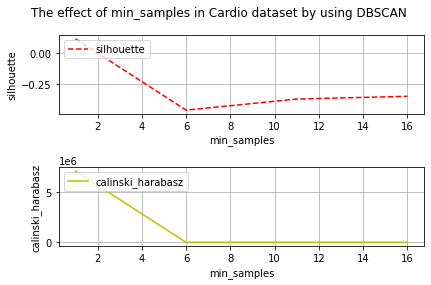

In [28]:
test_DBSCAN_min_samples(X,y)

# cluster of stroke

In [94]:
X1 = stroke.drop("stroke", axis=1)
y1 = stroke["stroke"]

In [99]:
from sklearn import metrics
def evaluate_metrics(y,y_pred,X):

    print('adjusted Rand index:',metrics.adjusted_rand_score(y,y_pred))
    print('adjusted_mutual_info_score:',metrics.adjusted_mutual_info_score(y,y_pred))
    
    silhouette=metrics.silhouette_score(X,y_pred)
    print('silhouette_score',silhouette)
    calinski_harabasz=metrics.calinski_harabasz_score(X,y_pred)
    print('calinski_harabasz_score',calinski_harabasz)
    davies_bouldin=metrics.davies_bouldin_score(X,y_pred)
    print('davies_bouldin_score',davies_bouldin)
    return silhouette,calinski_harabasz,davies_bouldin 

In [31]:
from sklearn.cluster import MiniBatchKMeans, KMeans  
s_score=[]
ch_wcore=[]
db_wcore=[]
for k in range(2,10):
    km = KMeans(init='k-means++', n_clusters=k, random_state=28) 
    km.fit(X1) 
    print('n_cluster:',k) 
    y_pred = km.predict(X1)  
    silhouette,calinski_harabasz,davies_bouldin =evaluate_metrics(y1,y_pred,X1)
    s_score.append(silhouette)
    ch_wcore.append(calinski_harabasz)
    db_wcore.append(davies_bouldin)

n_cluster: 2
adjusted Rand index: 0.09337557604544187
adjusted_mutual_info_score: 0.02402162237569333
silhouette_score 0.6375605368326552
calinski_harabasz_score 8123.719985749299
davies_bouldin_score 0.5360778229982236
n_cluster: 3
adjusted Rand index: 0.01677291642065794
adjusted_mutual_info_score: 0.037328178728762394
silhouette_score 0.36964569993537644
calinski_harabasz_score 6921.582671794457
davies_bouldin_score 0.9522647298276553
n_cluster: 4
adjusted Rand index: 0.009430667891515697
adjusted_mutual_info_score: 0.026721195082332467
silhouette_score 0.3714909564470113
calinski_harabasz_score 6827.6569465906405
davies_bouldin_score 0.8569331358581318
n_cluster: 5
adjusted Rand index: 0.008820271558390482
adjusted_mutual_info_score: 0.028229915107089065
silhouette_score 0.34758250382180417
calinski_harabasz_score 6149.480076058054
davies_bouldin_score 0.9261295105199151
n_cluster: 6
adjusted Rand index: 0.005975088104059974
adjusted_mutual_info_score: 0.023091787141084834
silhouet

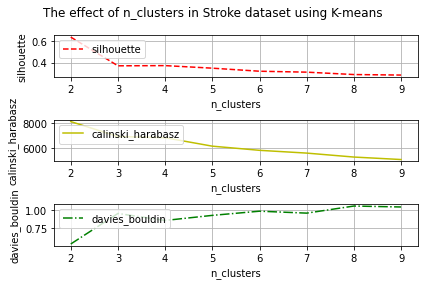

In [32]:
t=np.arange(2,10)
plt.suptitle('The effect of n_clusters in Stroke dataset using K-means') 
ax1 = plt.subplot(311)
ax1.plot(t,s_score, color="r",linestyle = "--",label='silhouette')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('silhouette')
ax1.legend(loc='upper left')  
ax1.grid(True)   

ax2 = plt.subplot(312)
ax2.plot(t,ch_wcore,color="y",linestyle = "-",label='calinski_harabasz')
ax2.set_xlabel('n_clusters')
ax2.set_ylabel('calinski_harabasz')
ax2.legend(loc='upper left')   
ax2.grid(True)   

ax3 = plt.subplot(313)
ax3.plot(t,db_wcore,color="g",linestyle = "-.",label='davies_bouldin')
ax3.set_xlabel('n_clusters')
ax3.set_ylabel('davies_bouldin')
ax3.legend(loc='upper left')  
ax3.grid(True)   

plt.tight_layout()  

## DBSCAN

In [102]:
from sklearn.preprocessing import StandardScaler
X1=StandardScaler().fit_transform(X1)

In [103]:
from sklearn import cluster
clst = cluster.DBSCAN(eps=4,min_samples=4); 
y_pred= clst.fit_predict(X1)
silhouette,calinski_harabasz,davies_bouldin=evaluate_metrics(y1,y_pred,X1)
print("Core sample num:%d"%len(clst.core_sample_indices_))

adjusted Rand index: 0.12168459607196246
adjusted_mutual_info_score: 0.028378578704654475
silhouette_score 0.3595022330815633
calinski_harabasz_score 333.1905451551486
davies_bouldin_score 0.9492409930832727
Core sample num:5108


In [104]:
def test_DBSCAN_epsilon(X,y):
    epsilons = range(1,5,1)
    print(epsilons)
    s_score=[]
    ch_wcore=[]
    db_wcore=[]
    for epsilon in epsilons:
        print(epsilon)
        clst = cluster.DBSCAN(eps=epsilon)
        y_pred = clst.fit_predict(X)
        silhouette,calinski_harabasz,davies_bouldin=evaluate_metrics(y,y_pred,X)
        s_score.append(silhouette)
        ch_wcore.append(calinski_harabasz)
        db_wcore.append(davies_bouldin)
    t=epsilons
    plt.suptitle('The effect of epsilon in Stroke dataset by using DBSCAN') 
    ax1 = plt.subplot(311)
    ax1.plot(t,s_score, color="r",linestyle = "--",label='silhouette')
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('silhouette')
    ax1.legend(loc='upper left')   
    ax1.grid(True)   

    ax2 = plt.subplot(312)
    ax2.plot(t,ch_wcore,color="y",linestyle = "-",label='calinski_harabasz')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('calinski_harabasz')
    ax2.legend(loc='upper left')   
    ax2.grid(True)   
    
    ax3 = plt.subplot(313)
    ax3.plot(t,db_wcore,color="g",linestyle = "-.",label='davies_bouldin')
    ax3.set_xlabel('epsilon')
    ax3.set_ylabel('davies_bouldin')
    ax3.legend(loc='upper left')   
    ax3.grid(True)   



    plt.tight_layout()

range(1, 5)
1
adjusted Rand index: -0.0036258160728282716
adjusted_mutual_info_score: 0.014797432388509071
silhouette_score 0.056849526975239636
calinski_harabasz_score 142.48428606359877
davies_bouldin_score 1.5967683410557996
2
adjusted Rand index: 0.005104512755730297
adjusted_mutual_info_score: 0.014254813601391636
silhouette_score 0.19953148690874803
calinski_harabasz_score 243.09878161121563
davies_bouldin_score 1.6504949060174632
3
adjusted Rand index: 0.12840348143560745
adjusted_mutual_info_score: 0.030005386301923155
silhouette_score 0.2813435511134985
calinski_harabasz_score 381.7809800809668
davies_bouldin_score 1.5171895065463636
4
adjusted Rand index: 0.12168459607196246
adjusted_mutual_info_score: 0.028378578704654475
silhouette_score 0.3595022330815633
calinski_harabasz_score 333.1905451551486
davies_bouldin_score 0.9492409930832727


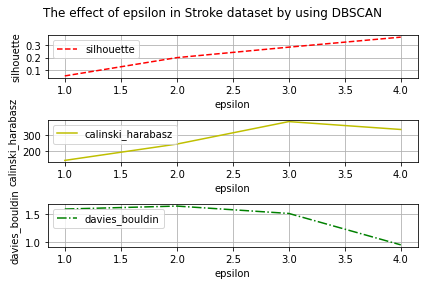

In [105]:
test_DBSCAN_epsilon(X1,y1)

In [85]:
def test_DBSCAN_min_samples(X,y):
    min_samples=range(1,20,5)
    s_score=[]
    ch_wcore=[]
    db_wcore=[]
    for num in min_samples:
        clst = cluster.DBSCAN(min_samples=num)
        y_pred = clst.fit_predict(X)
        print("min_samples:",num)
        silhouette,calinski_harabasz,davies_bouldin=evaluate_metrics(y,y_pred,X)
        s_score.append(silhouette)
        ch_wcore.append(calinski_harabasz)
        db_wcore.append(davies_bouldin)
    t=min_samples
    plt.suptitle('The effect of min_samples in Stroke dataset by using DBSCAN') 
    ax1 = plt.subplot(311)
    ax1.plot(t,s_score, color="r",linestyle = "--",label='silhouette')
    ax1.set_xlabel('min_samples')
    ax1.set_ylabel('silhouette')
    ax1.legend(loc='upper left')   
    ax1.grid(True)   

    ax2 = plt.subplot(312)
    ax2.plot(t,ch_wcore,color="y",linestyle = "-",label='calinski_harabasz')
    ax2.set_xlabel('min_samples')
    ax2.set_ylabel('calinski_harabasz')
    ax2.legend(loc='upper left')  
    ax2.grid(True)   
    
    
    ax3 = plt.subplot(313)
    ax3.plot(t,db_wcore,color="g",linestyle = "-.",label='davies_bouldin')
    ax3.set_xlabel('min_samples')
    ax3.set_ylabel('davies_bouldin')
    ax3.legend(loc='upper left')   
    ax3.grid(True)   

    plt.tight_layout()

min_samples: 1
adjusted Rand index: 0.0013033274430986638
adjusted_mutual_info_score: 0.01697289076520415
silhouette_score 0.045575680284653065
calinski_harabasz_score 45.202414914613236
davies_bouldin_score 0.4133765107635009
min_samples: 6
adjusted Rand index: -0.03731437583376763
adjusted_mutual_info_score: 0.01026827968501321
silhouette_score -0.09934718566104439
calinski_harabasz_score 50.20979958490006
davies_bouldin_score 1.5352648872958923
min_samples: 11
adjusted Rand index: -0.05681046485387472
adjusted_mutual_info_score: 0.01183864008041183
silhouette_score -0.19267557770052487
calinski_harabasz_score 57.520746568439584
davies_bouldin_score 1.5145349517987372
min_samples: 16
adjusted Rand index: -0.060806449389972435
adjusted_mutual_info_score: 0.01278006773109526
silhouette_score -0.21602841440299647
calinski_harabasz_score 104.87130475356615
davies_bouldin_score 1.4670547444495772


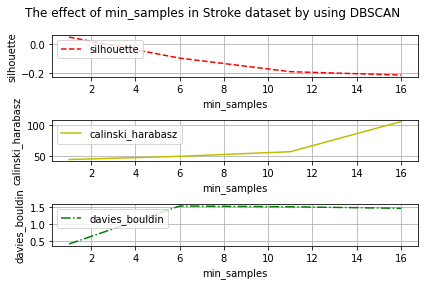

In [86]:
test_DBSCAN_min_samples(X1,y1)

# comparsion

In [106]:
X1 = stroke.drop("stroke", axis=1) 

In [111]:
kmeans1 = KMeans(init='k-means++',n_clusters=2, random_state=0).fit(X)
kmeans2 = KMeans(init='k-means++',n_clusters=2, random_state=0).fit(X1)


for i in range(2):
    print("Cardio",i)
    features1 = X[kmeans1.labels_==i].mean(axis=0)
    print(features1)
    print("Stroke",i)
    features2 = X1[kmeans2.labels_==i].mean(axis=0)
    print(features2) 

Cardio 0
age             51.996997
gender           1.328940
height         164.140615
weight          69.959427
ap_hi          117.406985
ap_lo           76.982558
cholesterol      1.256679
gluc             1.182982
smoke            0.080894
alco             0.046452
active           0.803197
dtype: float64
Stroke 0
gender                0.596922
age                  40.696601
hypertension          0.073496
heart_disease         0.038126
ever_married          0.621268
work_type             2.437988
Residence_type        0.506661
avg_glucose_level    89.516286
bmi                  27.413987
smoking_status        1.636426
dtype: float64
Cardio 1
age             54.425385
gender           1.386261
height         164.796861
weight          82.127872
ap_hi          143.895210
ap_lo           89.286746
cholesterol      1.571632
gluc             1.307107
smoke            0.100986
alco             0.066142
active           0.804038
dtype: float64
Stroke 1
gender                 0.525132
age  

In [ ]:
df.iloc[:,[2,4]]

# visualization

Text(0, 0.5, 'ap_lo')

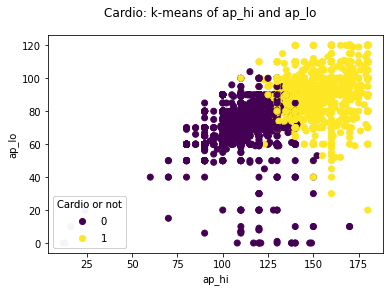

In [126]:
fig, ax = plt.subplots()
plt.suptitle('Cardio: k-means of ap_hi and ap_lo')
scatter = ax.scatter(X['ap_hi'],X['ap_lo'],c=y_kmeans);
legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Cardio or not")
ax.add_artist(legend1)
ax.set_xlabel('ap_hi')
ax.set_ylabel('ap_lo')

Text(0, 0.5, 'bmi')

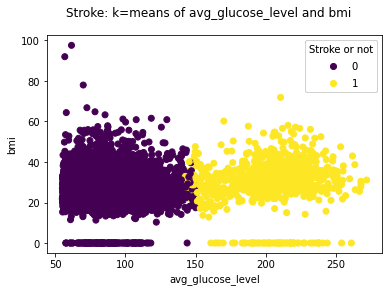

In [130]:
fig, ax = plt.subplots()
plt.suptitle('Stroke: k=means of avg_glucose_level and bmi')
scatter = ax.scatter(X1['avg_glucose_level'],X1['bmi'],c=kmeans2.labels_);
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Stroke or not")
ax.add_artist(legend1)
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('bmi')
#stroke 